In [51]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt
import numpy as np

from pathlib import Path
import sys
sys.path.insert(0, str(Path("__file__").absolute().parents[1]/"fluka_comparison"))
sys.path.insert(0, str(Path("__file__").absolute().parents[1]/"corsika_comparison"))
# print(sys.path)
# print(Path("__file__").absolute().parents[1])

from fluka_muon_data import fluka_dists, fluka_data, fluka_original_dists

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
fluka_en_hists, en_dists, ang_dists = fluka_original_dists(0)

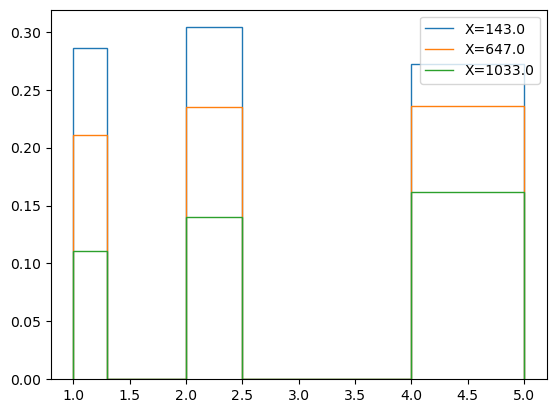

In [53]:
for en_hist in fluka_en_hists:
    plt.stairs(*en_hist[0:2], label = f"X={en_hist[2]}")
    
plt.legend() 

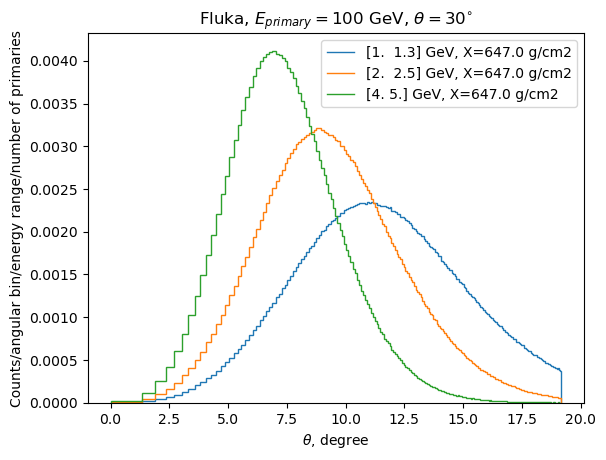

In [54]:
# ixdepth = 2

for ixdepth in range(3):
    if ixdepth in [1]: # Choose xdepths to plot
        for i, ang_dist in enumerate(ang_dists[ixdepth]):
            if i in [0, 1, 2]: # Choose energy ranges to plot
                theta = np.arccos(1 - ang_dist[1]/(2 * np.pi))*(180/np.pi)
                theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                # *np.sin(theta*np.pi/180)
                plt.stairs(ang_dist[0]*2*np.pi*np.sin(theta_mid), theta, label = f"{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

plt.title(r"Fluka, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel("Counts/angular bin/energy range/number of primaries")
plt.legend()

In [55]:
from corsika_comparison import (corsika_hist, combined_data, 
                                 corsika_en_theta_2dhist,
                                 combined_ang_data)

In [26]:
ang_dists[0][0][1]

array([0.        , 0.00174533, 0.00349066, 0.00523599, 0.00698132,
       0.00872665, 0.01047197, 0.0122173 , 0.01396263, 0.01570796,
       0.01745329, 0.01919862, 0.02094395, 0.02268928, 0.02443461,
       0.02617994, 0.02792527, 0.0296706 , 0.03141592, 0.03316126,
       0.03490658, 0.03665191, 0.03839725, 0.04014257, 0.0418879 ,
       0.04363323, 0.04537856, 0.04712389, 0.04886922, 0.05061455,
       0.05235988, 0.05410521, 0.05585054, 0.05759586, 0.05934119,
       0.06108652, 0.06283185, 0.06457718, 0.06632251, 0.06806784,
       0.06981317, 0.0715585 , 0.07330383, 0.07504915, 0.07679449,
       0.07853982, 0.08028515, 0.08203048, 0.0837758 , 0.08552113,
       0.08726646, 0.08901179, 0.09075712, 0.09250245, 0.09424778,
       0.09599311, 0.09773844, 0.09948377, 0.1012291 , 0.1029744 ,
       0.1047198 , 0.1064651 , 0.1082104 , 0.1099557 , 0.1117011 ,
       0.1134464 , 0.1151917 , 0.1169371 , 0.1186824 , 0.1204277 ,
       0.122173  , 0.1239184 , 0.1256637 , 0.127409  , 0.12915

In [56]:
corsika_en_hist = corsika_hist(fluka_en_hists[0][1])

[0.28559864 0.         0.3038867  0.         0.27259471], fluka muons, X=143.0
[0.32504277 0.         0.31722239 0.         0.27775678], corsika $\mu^{+}$+$\mu^{-}$, X=143.0
[0.21124895 0.         0.23536078 0.         0.23622453], fluka muons, X=647.0
[0.25756159 0.         0.27543985 0.         0.26459517], corsika $\mu^{+}$+$\mu^{-}$, X=638.0
[0.11038841 0.         0.14009889 0.         0.1613168 ], fluka muons, X=1033.0
[0.11289422 0.         0.14525184 0.         0.16486758], corsika $\mu^{+}$+$\mu^{-}$, X=1167.0


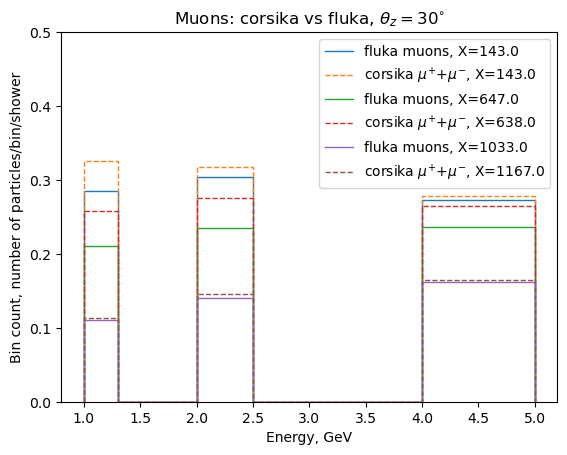

In [66]:
ixdepth = 2
for ixdepth in range(3):
    cors_muons = combined_data(corsika_en_hist, (-13, 13), ixdepth)
    cors_muons[0][[1,3]] = 0
    fluk_muons = fluka_en_hists[ixdepth]

    plt.stairs(fluk_muons[0], fluk_muons[1], label = f"fluka muons, X={fluk_muons[2]}")
    print(f"{fluk_muons[0]}, fluka muons, X={fluk_muons[2]}")
    plt.stairs(*cors_muons[0:2], label = f"corsika {cors_muons[2]}, {cors_muons[3]}", linestyle = "--")
    print(f"{cors_muons[0]}, corsika {cors_muons[2]}, {cors_muons[3]}")

plt.title(r"Muons: corsika vs fluka, $\theta_{z} = 30^{\circ}$")
plt.xlabel("Energy, GeV")
plt.ylabel("Bin count, number of particles/bin/shower")
plt.ylim(0, 0.5)
plt.legend()

/tmp/ipykernel_3448266/3457147855.py:6: RuntimeWarning: invalid value encountered in divide
  plt.stairs(fluk_muons[0]/cors_muons[0], fluk_muons[1], label = f"fluka/corsika, X={fluk_muons[2]}")


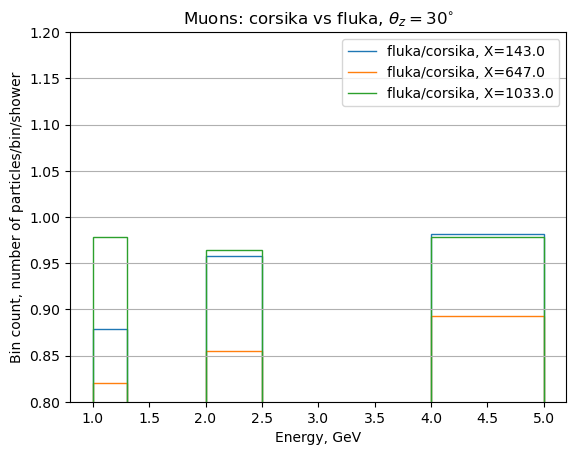

In [63]:
for ixdepth in range(3):
    cors_muons = combined_data(corsika_en_hist, (-13, 13), ixdepth)
    cors_muons[0][[1,3]] = 0
    fluk_muons = fluka_en_hists[ixdepth]

    plt.stairs(fluk_muons[0]/cors_muons[0], fluk_muons[1], label = f"fluka/corsika, X={fluk_muons[2]}")
    # plt.stairs(*cors_muons[0:2], label = f"corsika {cors_muons[2]}, {cors_muons[3]}", linestyle = "--")
plt.title(r"Muons: corsika vs fluka, $\theta_{z} = 30^{\circ}$")
plt.xlabel("Energy, GeV")
plt.ylabel("Bin count, number of particles/bin/shower")
plt.ylim(0.8, 1.2)
plt.grid(axis ='y')
plt.legend()

In [126]:
ir_theta = np.arccos(1 - ang_dists[0][0][1]/(2*np.pi))
corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists[0][1], ir_theta)

In [127]:
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

In [110]:
corsika_comb_hist[0][0][0].size

200

In [111]:
corsika_comb_hist[0][0][1].size

201

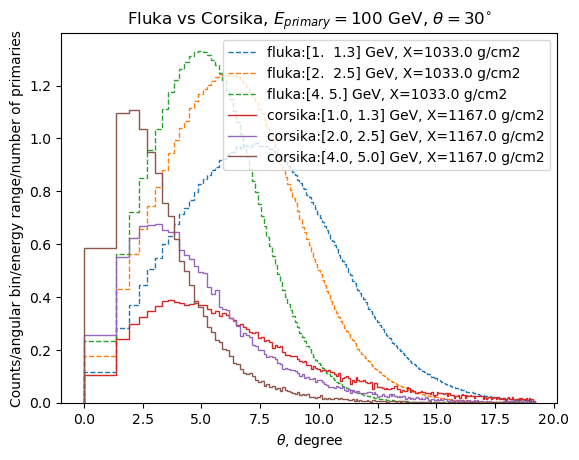

In [141]:

ixlist = [2]
for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(ang_dists[ixdepth]):
            if i in [0, 1, 2]: # Choose energy ranges to plot
                theta = np.arccos(1 - ang_dist[1]/(2 * np.pi))*(180/np.pi)
                theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                
                delta_theta = (theta[1:] - theta[:-1]) * np.pi/180
                # ang_dist[0]*2*np.pi*np.sin(theta_mid)
                plt.stairs(ang_dist[0]/delta_theta/(2*np.pi), theta, 
                           label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2",
                           linestyle='--')


for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(corsika_comb_hist[ixdepth]):
            if i in [0, 2, 4]: # Choose energy ranges to plot
                theta = ang_dist[1]
                theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                delta_theta = (theta[1:] - theta[:-1]) * np.pi/180
                plt.stairs(ang_dist[0]/delta_theta, theta, label = f"corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

plt.title(r"Fluka vs Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel("Counts/angular bin/energy range/number of primaries")
plt.legend()

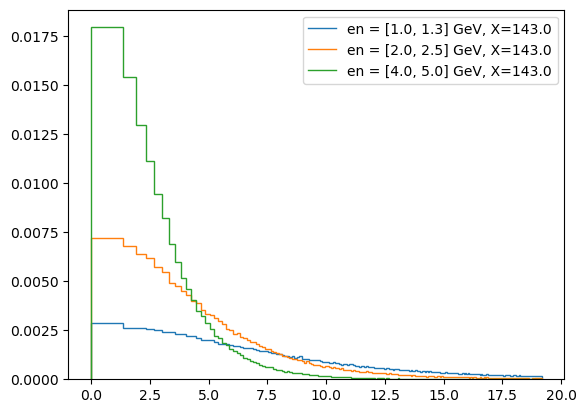

In [34]:
pdg = -13
ixdepth = 0

for ind_energy in range(5):
    if ind_energy in [0, 2, 4]:
        ang_dist = corsika_en_hist[pdg][0][ixdepth][0][ind_energy]
        en_bins = corsika_en_hist[pdg][0][ixdepth][1]
        cur_en = f"[{en_bins[ind_energy]}, {en_bins[ind_energy + 1]}]" 
        ang_bins = corsika_en_hist[pdg][0][ixdepth][2]*180/np.pi
        # xdepth = corsika_en_hist[pdg][0][ixdepth][0][ind_energy]
        xdepth = corsika_en_hist[pdg][0][ixdepth][3]
        plt.stairs(ang_dist, ang_bins, label = f"en = {cur_en} GeV, X={xdepth}")
plt.legend()

In [118]:
ir_theta = np.arccos(1 - ang_dists[0][0][1]/(2*np.pi))
corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists[0][1], ir_theta)
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

In [119]:
corsika_en_hist_ang = corsika_en_theta_2dhist(fluka_en_hists[0][1], 
                                              np.linspace(0, 30* np.pi/180, 51))
corsika_comb_hist_ang = combined_ang_data(corsika_en_hist_ang, (-13, 13))

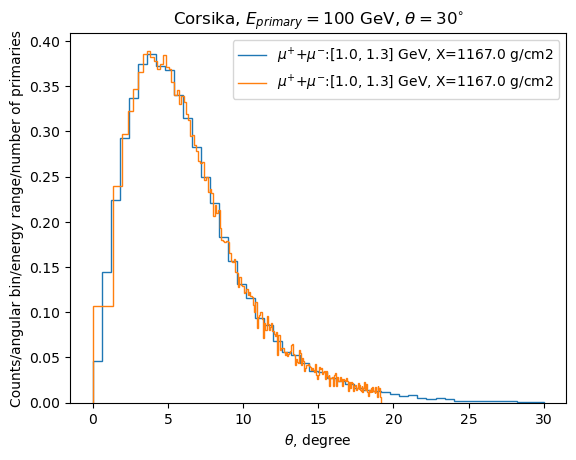

In [138]:
ixlist = [2]
ielist = [0]
for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(corsika_comb_hist_ang[ixdepth]):
            if i in ielist: # Choose energy ranges to plot
                delta_theta = (ang_dist[1][1:] - ang_dist[1][:-1])*np.pi/180
                plt.stairs(ang_dist[0]/delta_theta, ang_dist[1], label = f"{ang_dist[4]}:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(corsika_comb_hist[ixdepth]):
            if i in ielist: # Choose energy ranges to plot
                delta_theta = (ang_dist[1][1:] - ang_dist[1][:-1])*np.pi/180
                plt.stairs(ang_dist[0]/delta_theta, ang_dist[1], label = f"{ang_dist[4]}:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")



plt.title(r"Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel("Counts/angular bin/energy range/number of primaries")
plt.legend()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def merge_bins(hist, bins, ntimes = 1):
    for _ in range(ntimes):
        new_hist = (hist[:-1] + hist[1:])[::2]
        new_bins = bins[::2]
        if (hist.size % 2) > 0:
            new_hist = np.append(new_hist, hist[-1])
            new_bins = np.append(new_bins, bins[-1])
        
        hist = new_hist
        bins = new_bins
        
    return hist, bins

In [100]:
xbins = np.linspace(0, 1, 4)
rand_data = np.random.random(10)
# rand_data = -np.log(1-np.random.random(1000))


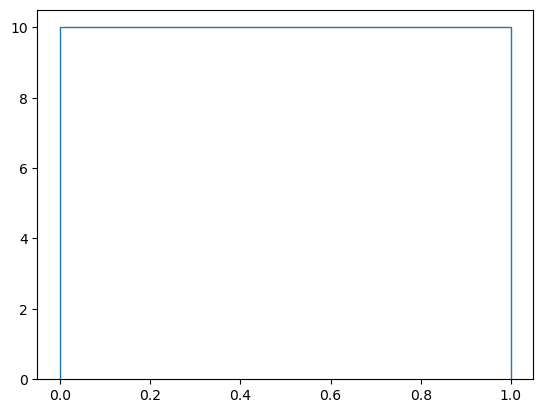

In [105]:

hist, edge = merge_bins(*np.histogram(rand_data, xbins),2)

plt.stairs(hist, edge)